# Exploratory Data Analysis

#### Roles to Explore

Set up
1. Import all libraries that will be utilized
2. Import datasets
3. Clean up columns in DataFrame

In [9]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda date: ast.literal_eval(date) if pd.notna(date) else date)

#### Inspect Opportunities throughout the whole world

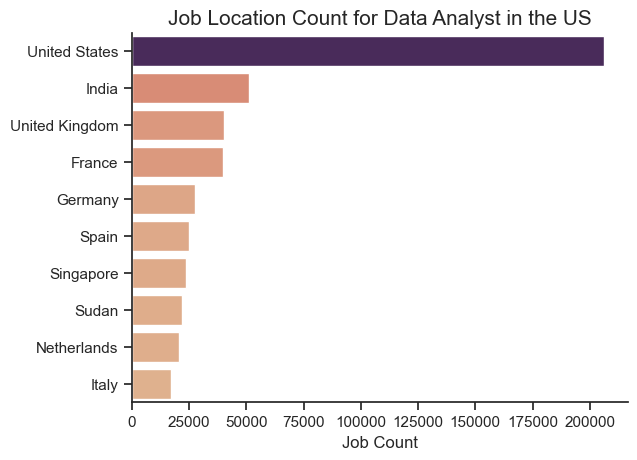

In [27]:
df_us_plot = df['job_country'].value_counts().head(10).to_frame().copy()

sns.set_theme(style='ticks')
sns.barplot(data=df_us_plot, x='count', y='job_country', hue='count', palette='flare')
sns.despine()
plt.title('Job Location Count for Data Analyst in the US', fontsize=15)
plt.xlabel('Job Count')
plt.ylabel('')
plt.legend().remove()
plt.show()

#### Filter for Data Analyst roles in the US

In [6]:
df_us_da = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

#### Job Location Count in the US

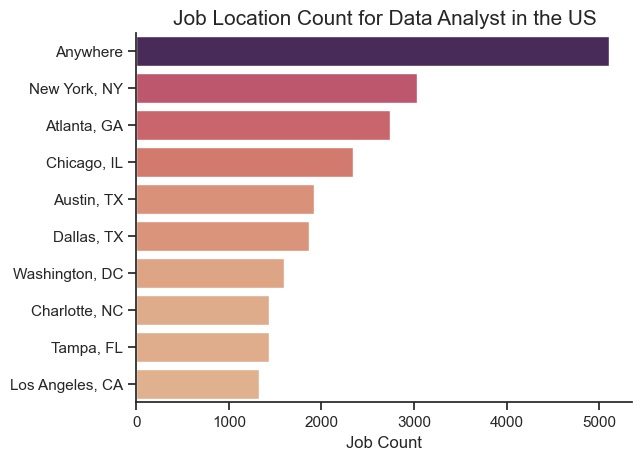

In [22]:
df_us_da_plot = df_us_da['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_us_da_plot, x='count', y='job_location', hue='count', palette='flare')
sns.despine()
plt.title('Job Location Count for Data Analyst in the US', fontsize=15)
plt.xlabel('Job Count')
plt.ylabel('')
plt.legend().remove()
plt.show()

#### Inspect Boolean Values (Work from Home, Degree Mention, Health Insurance)

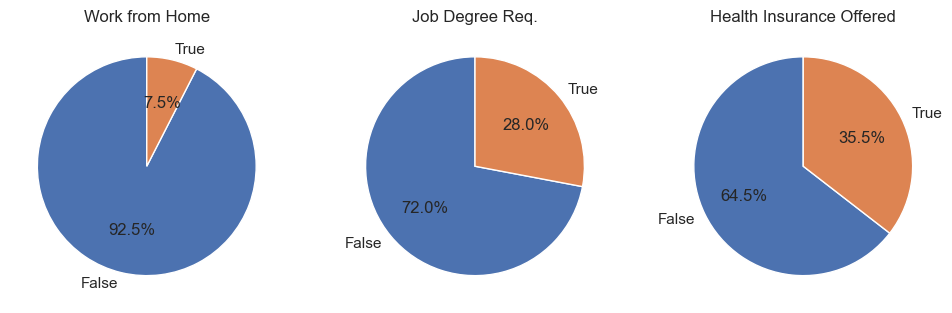

In [23]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12, 6))

dict_columns = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_columns.items()):
    ax[i].pie(df_us_da[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

#### Potential Job Offer counts from the Top 10 Firms

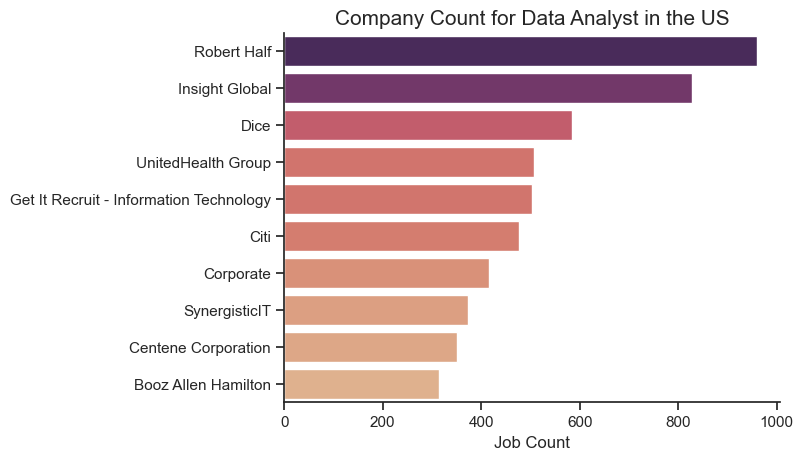

In [24]:
df_us_da_plot = df_us_da['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_us_da_plot, x='count', y='company_name', hue='count', palette='flare')
sns.despine()
plt.title('Company Count for Data Analyst in the US', fontsize=15)
plt.xlabel('Job Count')
plt.ylabel('')
plt.legend().remove()
plt.show()